<a href="https://colab.research.google.com/github/kexin516/mnist-digit-classification/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 1: Load and Preprocess the Dataset
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# The MNIST dataset consists of 28x28 grayscale images of digits (0-9) and their corresponding labels.

# Normalize the pixel values to range [0, 1] and reshape data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
# The pixel values (0-255) are normalized to a range of [0, 1] by dividing by 255.
# Each image in MNIST is 28x28.
# We reshape the images to (28, 28, 1) to include channel dimension (grayscale images have one channel), to make it compatible with the convolutional layers.

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Labels are one-hot encoded to turn them into 10-dimensional vectors, where each index corresponds to a digit (0-9).

# Check shapes of data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [ ]:
# Step 2: Build a Convolutional Neural Network (CNN)
# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Explicit input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Apply Dropout to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (0-9)
])
# Convolutional Layers: The Conv2D layers extract features from the images by applying filters (kernels). We use ReLU as the activation function.
# Pooling Layers: MaxPooling2D layers reduce the spatial dimensions of the image, helping to reduce computational load and prevent overfitting.
# Flatten: Converts the 2D features into a 1D vector to pass to the fully connected layers.
# Dense Layers: After flattening, the network learns complex patterns with the fully connected layers.
# Dropout: Helps prevent overfitting by randomly setting a fraction (50%) of the weights to zero during training.
# Softmax: The final layer outputs a probability distribution for the 10 possible classes (digits 0-9).

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# to compile a Keras neural network model. This is a crucial step before training the model.

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.7748 - loss: 0.6882 - val_accuracy: 0.9772 - val_loss: 0.0742
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9678 - loss: 0.1153 - val_accuracy: 0.9870 - val_loss: 0.0389
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9795 - loss: 0.0738 - val_accuracy: 0.9892 - val_loss: 0.0357
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9844 - loss: 0.0563 - val_accuracy: 0.9912 - val_loss: 0.0295
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9869 - loss: 0.0454 - val_accuracy: 0.9910 - val_loss: 0.0294
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.9896 - loss: 0.0371 - val_accuracy: 0.9894 - val_loss: 0.0405
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9907 - loss: 0.0330 - val_accuracy: 0.9913 - val_loss: 0.0328
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9920 - loss: 0.0277 - 

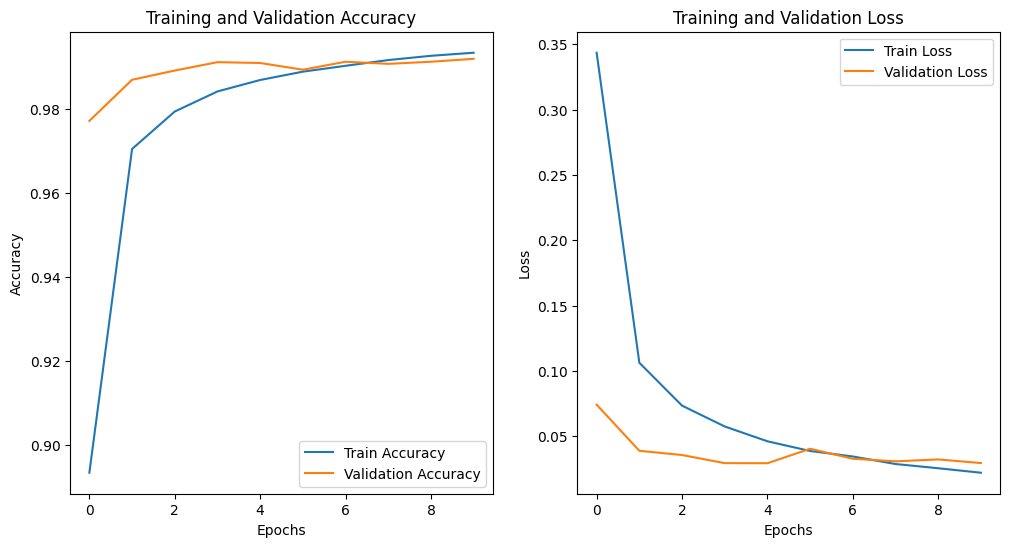

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9883 - loss: 0.0409
Test accuracy: 0.9919999837875366


In [ ]:
# Step 3: Train and Evaluate the Model
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
# The model is trained using the model.fit() function.
# The training is done for 10 epochs, meaning the model will pass through the entire dataset 10 times.
# We use a batch size of 64, meaning each step will use 64 images at a time.
# During training, we validate the model’s performance using the test data (x_test, y_test) to see how well the model generalizes to unseen data.

# Plot training & validation accuracy/loss over epochs
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
# use matplotlib to visualize the training progress by plotting the training/validation accuracy and loss over epochs..
# These graphs help us understand how well the model is learning and whether it's overfitting or underfitting.

# Evaluate the model's performance on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
# After training, we evaluate the model on the test set and print the final accuracy.

**High Accuracy:** The model has achieved a very high accuracy (both in training and testing), which is a great sign that it's learning well and generalizing effectively to unseen data.

**Low Loss:** A low loss value (0.0409) during training indicates that the model is making relatively few mistakes during training.

**Test Accuracy:** The test accuracy is nearly 99%, meaning the model performs well on unseen data, which is a strong indicator of good generalization.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Actual: 8, Predicted: 8


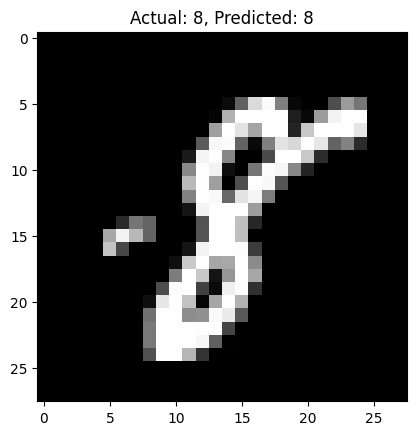

Actual: 9, Predicted: 9


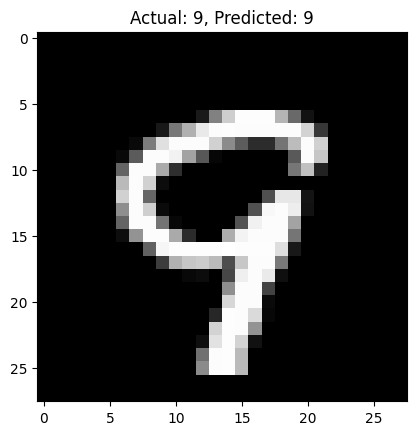

Actual: 5, Predicted: 5


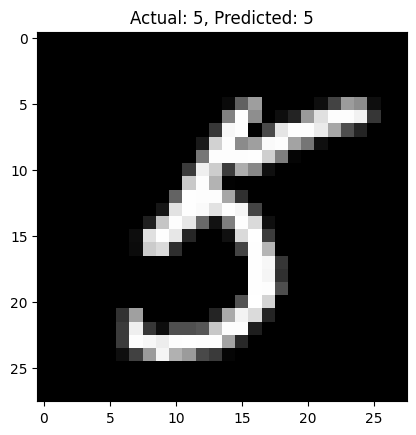

Actual: 2, Predicted: 2


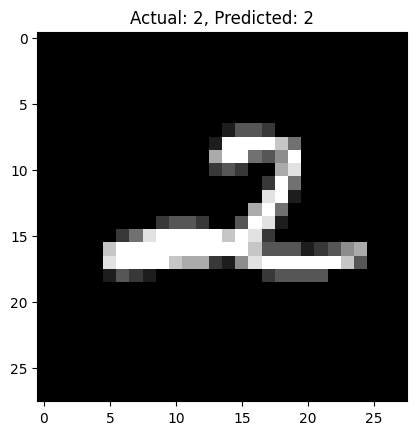

Actual: 0, Predicted: 0


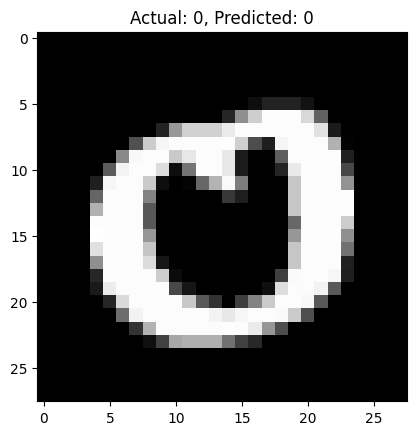

Actual: 2, Predicted: 2


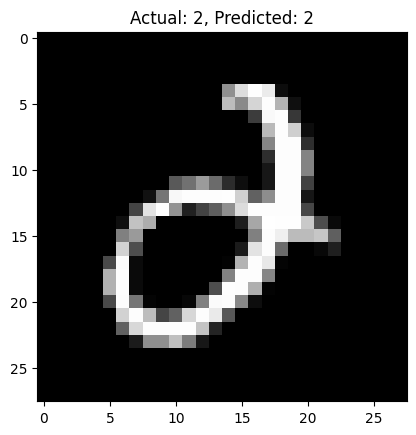

Actual: 0, Predicted: 0


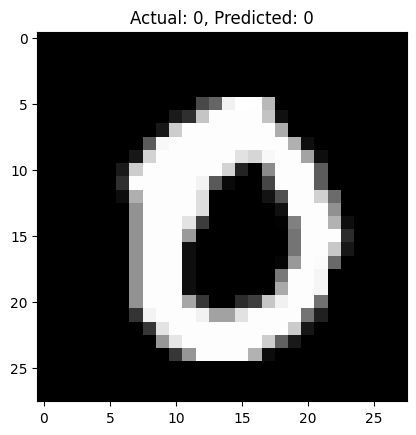

Actual: 8, Predicted: 7


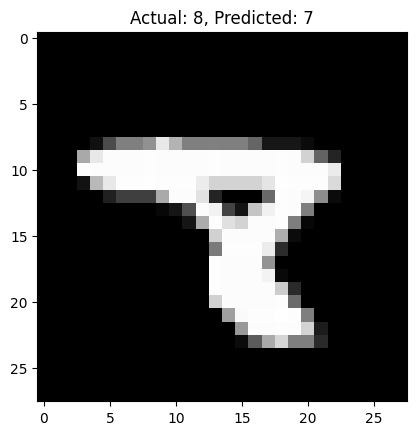

Actual: 6, Predicted: 6


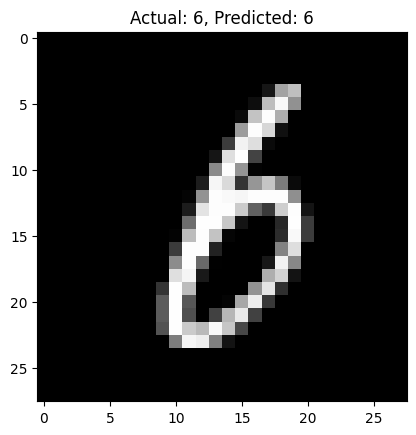

Actual: 4, Predicted: 4


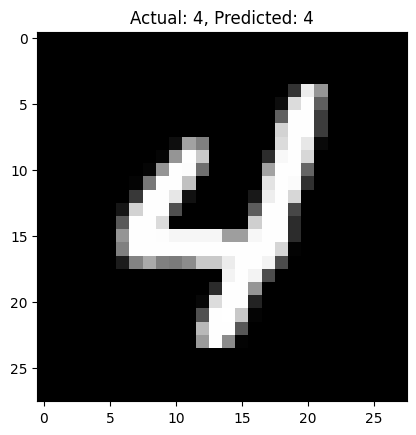

In [ ]:
# Step 4: Display Example Predictions
# Randomly select 10 indices from the test set
random_i = np.random.choice(len(x_test), size=10, replace=False)

# Make predictions for the randomly selected samples
predictions = model.predict(x_test[random_i])

# Display actual vs predicted labels for the random samples
for i in range(10):
    # Print the actual vs predicted labels
    print(f"Actual: {np.argmax(y_test[random_i][i])}, Predicted: {np.argmax(predictions[i])}")

    # Plot the image
    plt.imshow(x_test[random_i][i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {np.argmax(y_test[random_i][i])}, Predicted: {np.argmax(predictions[i])}")
    plt.show()

# Display the randomly selected 10 test images along with the actual and predicted labels for comparison.

### **Discuss at least one example where the model made a wrong prediction and analyze why it happened.**
The model predicted the digit "7" when the actual digit was "8". This is a misclassification.

I think it's because of the ambiguity between digits, especially in this image, the bottom loop of "8" overlapped together. In cases like these, the model may fail to correctly distinguish between digits if the handwriting is somewhat unclear or the features it learned from the training data are not robust enough to differentiate between similar digits.


### **Step 5: Reflection and Future Improvements**
**Identify one limitation of your current model.**

Limitation: Even though the MNIST dataset is quite large, it’s possible that certain edge cases (like this ambiguous "8" or handwriting style) were underrepresented or not well-represented in the dataset, which leads the model to struggle with distinguishing these specific cases.

**Suggest at least one way to improve accuracy (e.g., using CNNs, increasing layers, tuning hyperparameters).**

One way to improve the accuracy of the current model, especially in ambiguous cases, is by adding more convolutional layers. It allows the model to learn more complex features and patterns, which can be important when distinguishing subtle differences between similar digits like "7" and "8."